In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving netflix1.csv to netflix1 (1).csv


In [ ]:
df = pd.read_csv("netflix1.csv")

In [ ]:
df['director'].fillna('Unknown', inplace=True)

<ipython-input-29-96f125a47948>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)


In [ ]:
df['country'].fillna(df['country'].mode()[0], inplace=True)

<ipython-input-30-0e353cbf29c3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna(df['country'].mode()[0], inplace=True)


In [ ]:
df.dropna(subset=['date_added'], inplace=True)

In [ ]:
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

<ipython-input-32-a7863e685e9c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(df['rating'].mode()[0], inplace=True)


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [ ]:
df['genre'] = df['listed_in'].apply(lambda x: x.split(', ')[0])

In [ ]:
df['year_added'] = df['date_added'].dt.year

# **Distribution of Content Types**

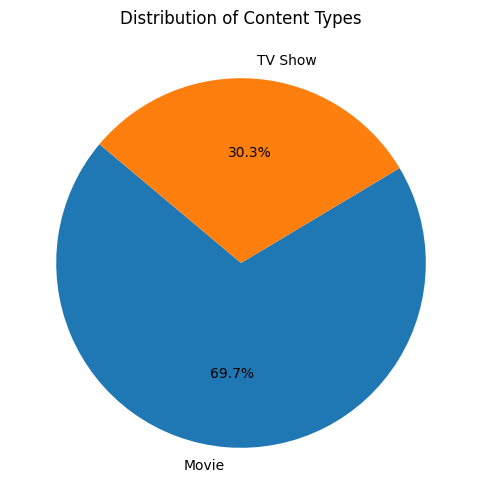

In [ ]:
plt.figure(figsize=(6, 6))
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Content Types')
plt.ylabel('')
plt.show()

This pie chart shows that the majority of Netflix content is movies, while TV shows occupy a smaller share. It highlights Netflix's greater investment in film production compared to series. This could reflect user preference or Netflix’s strategy. The proportions are clearly distinguishable.

# **Number of Releases Per Year**

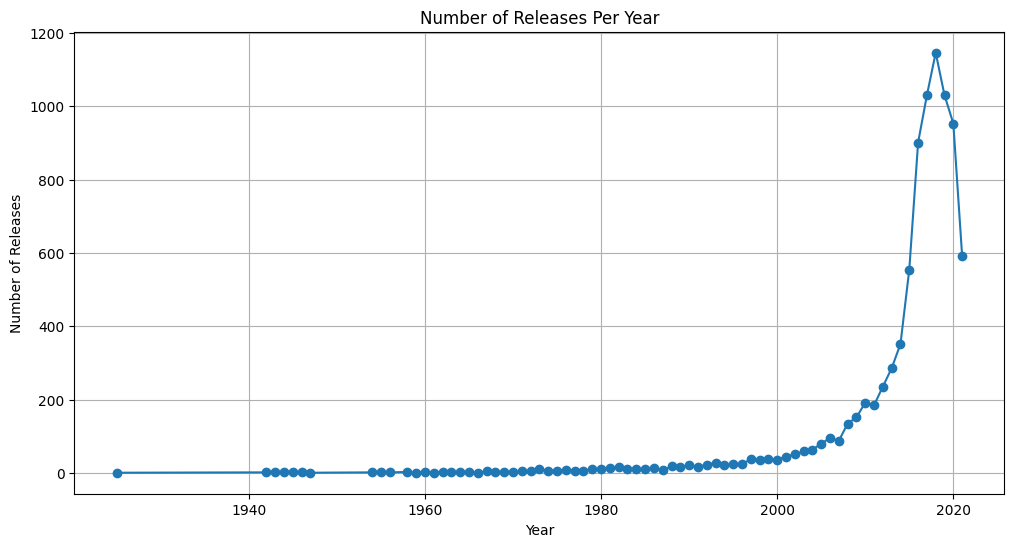

In [ ]:
releases_per_year = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(releases_per_year.index, releases_per_year.values, marker='o')
plt.title('Number of Releases Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.show()

The line plot shows a sharp increase in releases post-2015, peaking around 2018–2019. Earlier years had significantly fewer releases. The trend indicates Netflix’s expanding content production over time. A slight dip post-2020 might reflect pandemic-related delays.

# **Top 10 Genres**

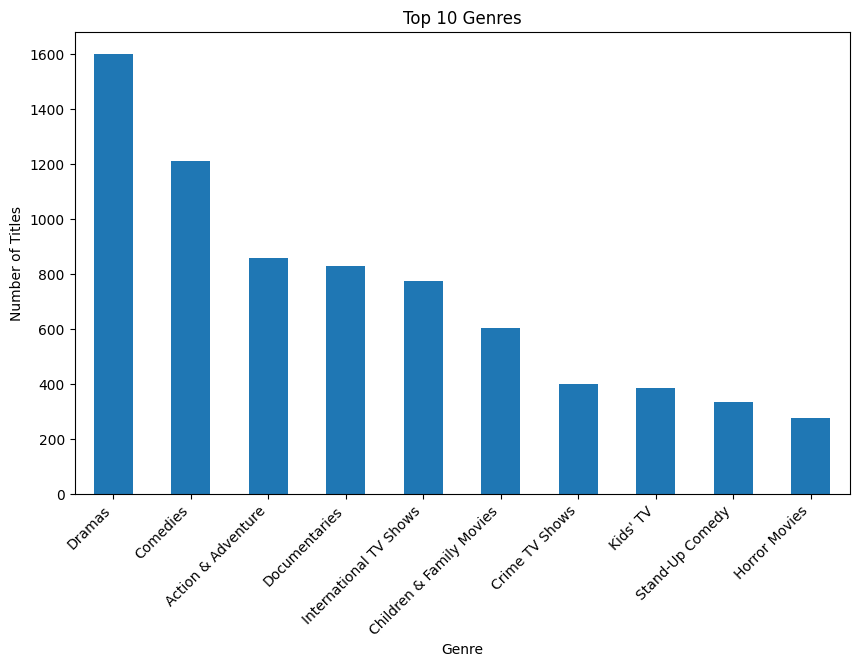

In [ ]:
top_genres = df['genre'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar')
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.show()


This bar chart displays the most popular genres on Netflix, with "Dramas" and "Comedies" leading. It reveals content preferences of the platform’s audience. These genres dominate the catalog, suggesting they attract more viewers. Lesser-represented genres like “Horror” are at the bottom.

# **Content Added Over Time**

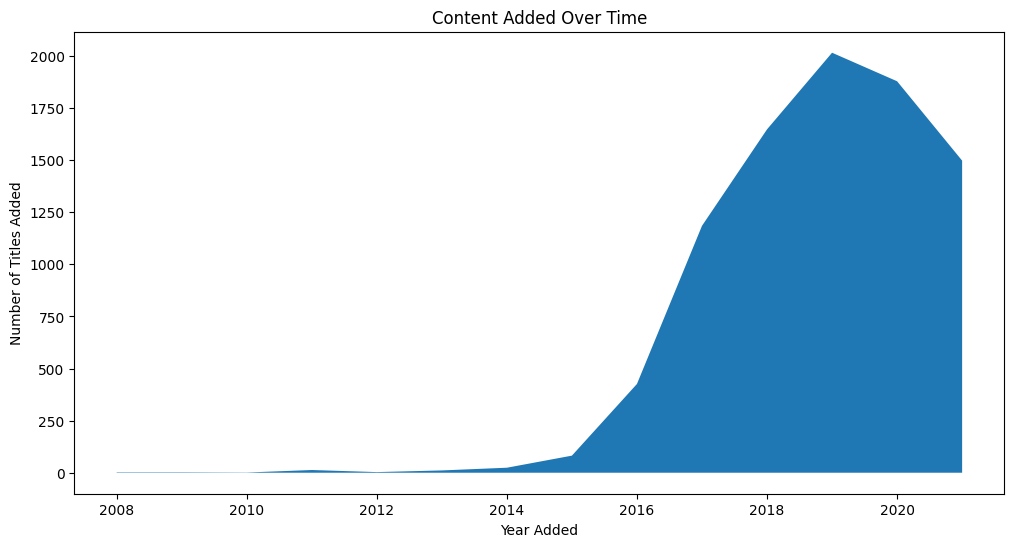

In [ ]:
content_added_year = df.groupby('year_added')['show_id'].count()
plt.figure(figsize=(12, 6))
plt.fill_between(content_added_year.index, content_added_year.values)
plt.title('Content Added Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.show()

This area chart shows a steady rise in content additions, with the biggest surge between 2015 and 2020. The upward trend reflects Netflix's aggressive expansion and content acquisition strategy. This helps understand Netflix’s growth phases.

# ** Distribution of Ratings**

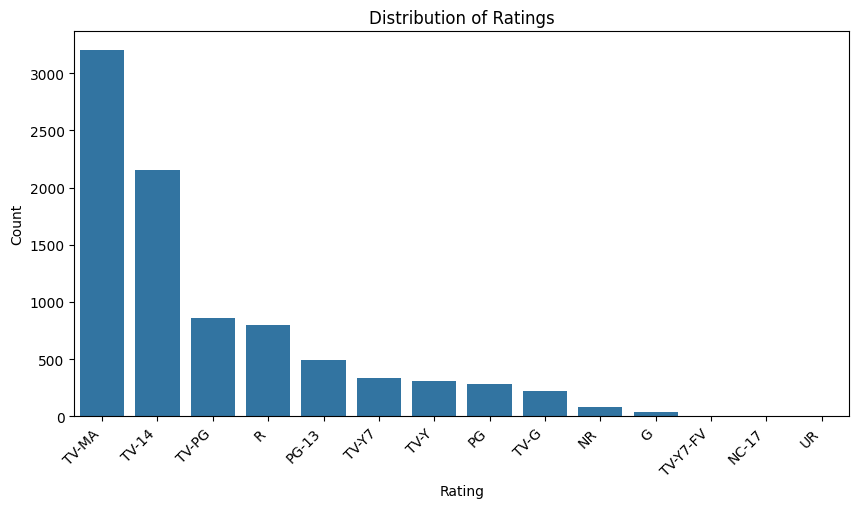

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

The count plot shows that most content is rated “TV-MA” or “TV-14,” indicating a focus on mature audiences. There are fewer shows with general ratings like “G” or “PG.” This highlights Netflix’s orientation toward teen and adult viewers.

# **Movie Duration Distribution**

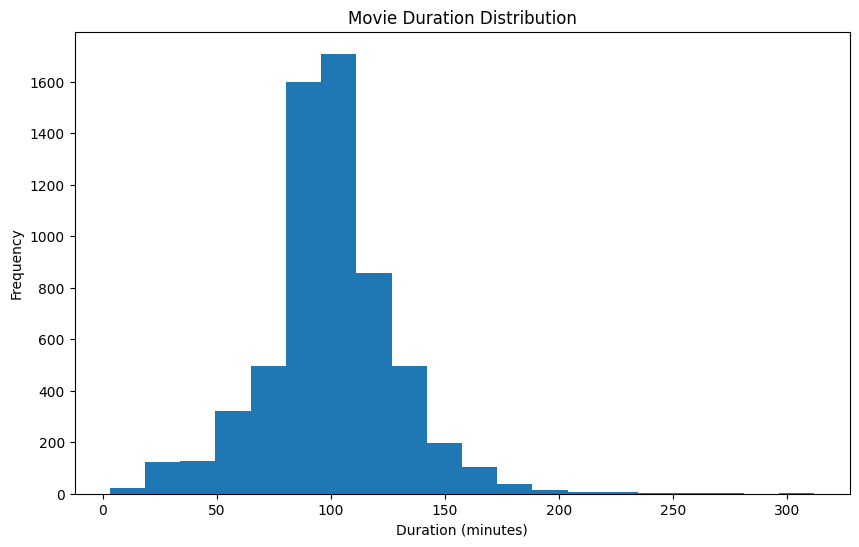

In [ ]:
movies_df = df[df['type'] == 'Movie']
plt.figure(figsize=(10, 6))
plt.hist(movies_df['duration'].str.extract('(\d+)').astype(float), bins=20)
plt.title('Movie Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


The histogram indicates that most movies on Netflix are between 80 to 120 minutes long. Very short or very long movies are rare. This suggests a standard format that aligns with user watch preference

# **Distribution of TV Show Seasons**

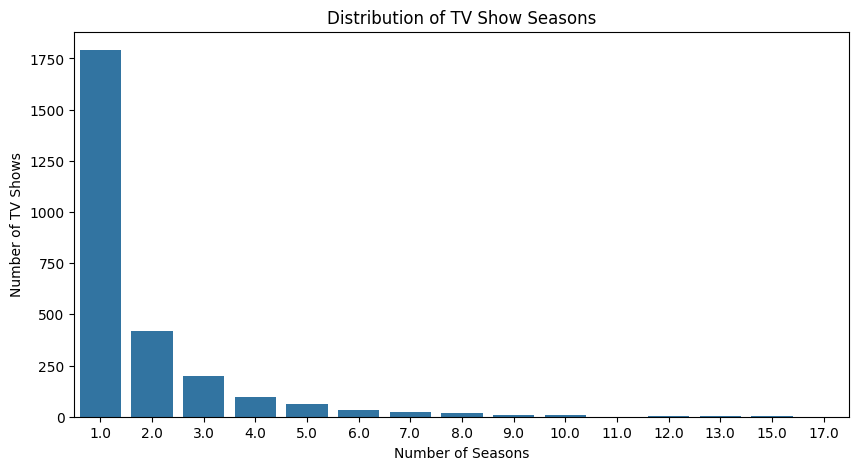

In [ ]:
tv_shows_df = df[df['type'] == 'TV Show'].copy()
tv_shows_df['seasons'] = tv_shows_df['duration'].str.extract('(\d+)').astype(float)
seasons_counts = tv_shows_df['seasons'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=seasons_counts.index, y=seasons_counts.values)
plt.title('Distribution of TV Show Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of TV Shows')
plt.show()

Most TV shows on Netflix have just 1 or 2 seasons, as shown in this bar plot. Limited-series or single-season shows dominate. This may indicate experimental or short-format storytelling on the platform.

# **Top 10 Countries Producing Content**

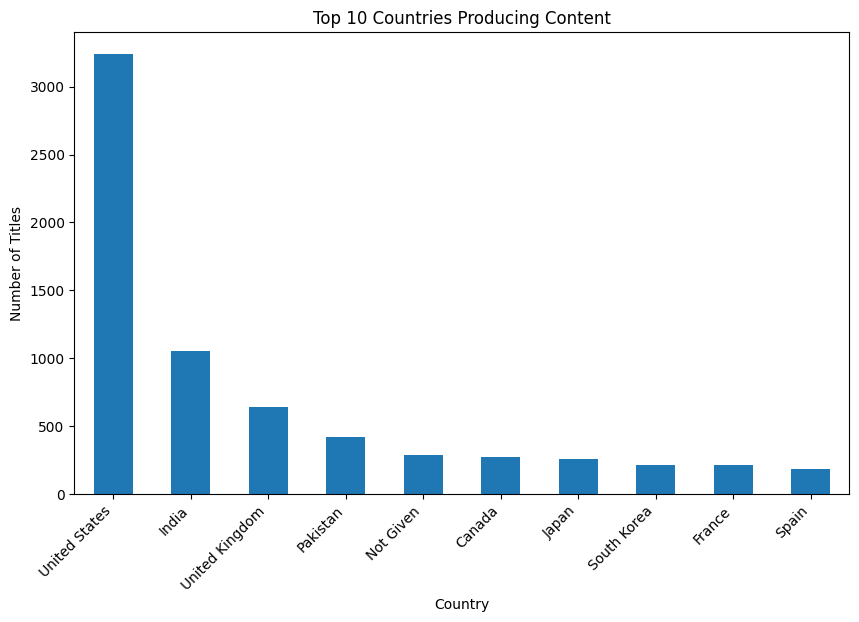

In [ ]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar')
plt.title('Top 10 Countries Producing Content')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.show()

The bar chart shows the USA as the top content producer, followed by India and the UK. It reflects the global dominance of certain film industries. This also suggests where Netflix sources most of its content.



# **Genre vs. Release Year**

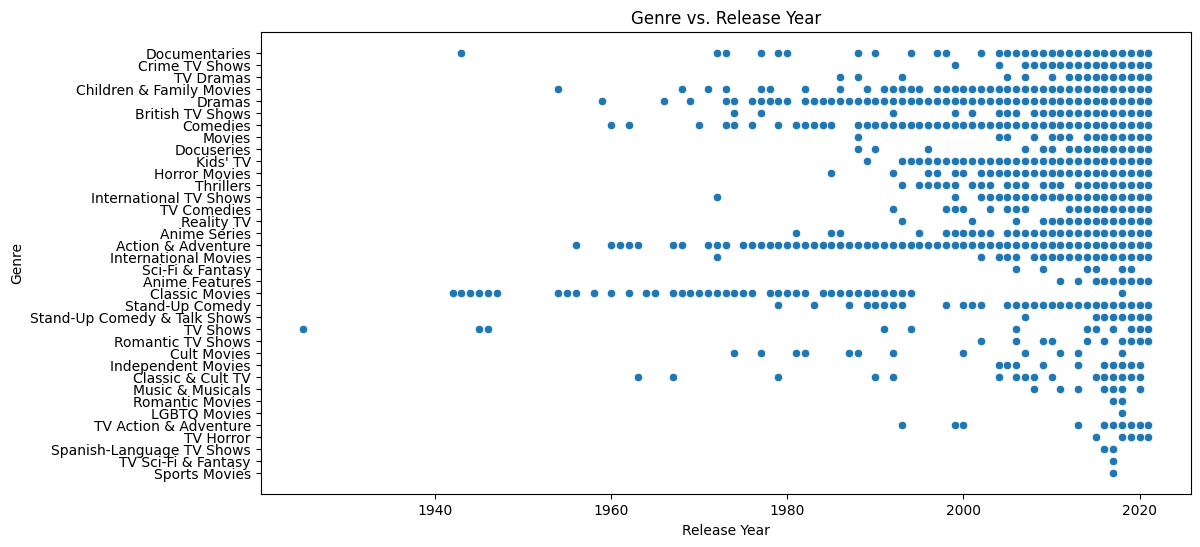

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='release_year', y='genre', data=df)
plt.title('Genre vs. Release Year')
plt.xlabel('Release Year')
plt.ylabel('Genre')
plt.show()

This scatter plot shows how genres are distributed across release years. Some genres have consistent production over time, while others peak in specific years. It gives a visual map of changing content trends.



# **. Rating vs. Type**

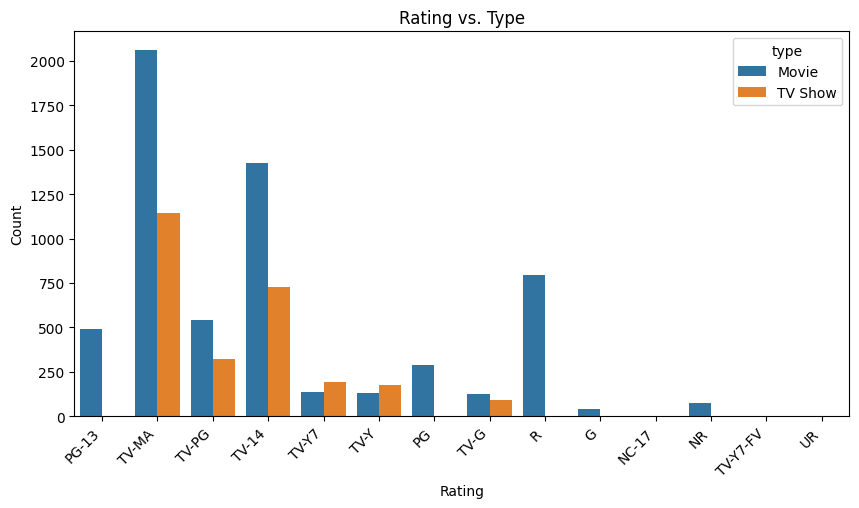

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='rating', hue='type', data=df)
plt.title('Rating vs. Type')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


The count plot compares ratings between movies and TV shows. Movies are more often rated “TV-MA,” while TV shows are evenly spread across “TV-14” and “TV-MA.” This suggests content maturity varies more in TV shows.



# **Top 10 Directors**

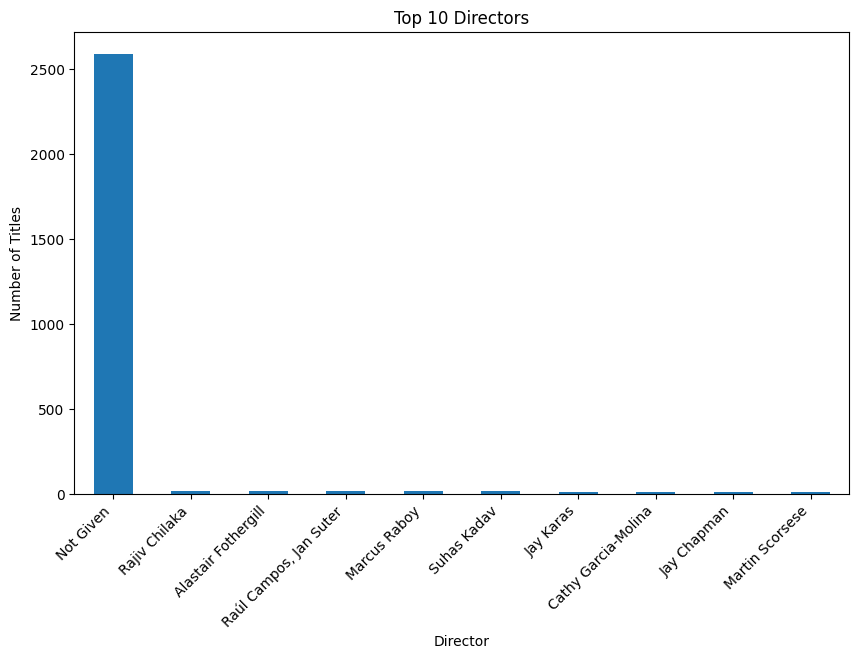

In [ ]:
top_directors = df['director'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_directors.plot(kind='bar')
plt.title('Top 10 Directors')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.show()

This bar chart highlights directors with the most content on Netflix. Directors like Raúl Campos and Jan Suter appear frequently. It shows Netflix’s recurring collaborations or licensing with specific creators.



# **Most Common Genres by Top 10 Countries**

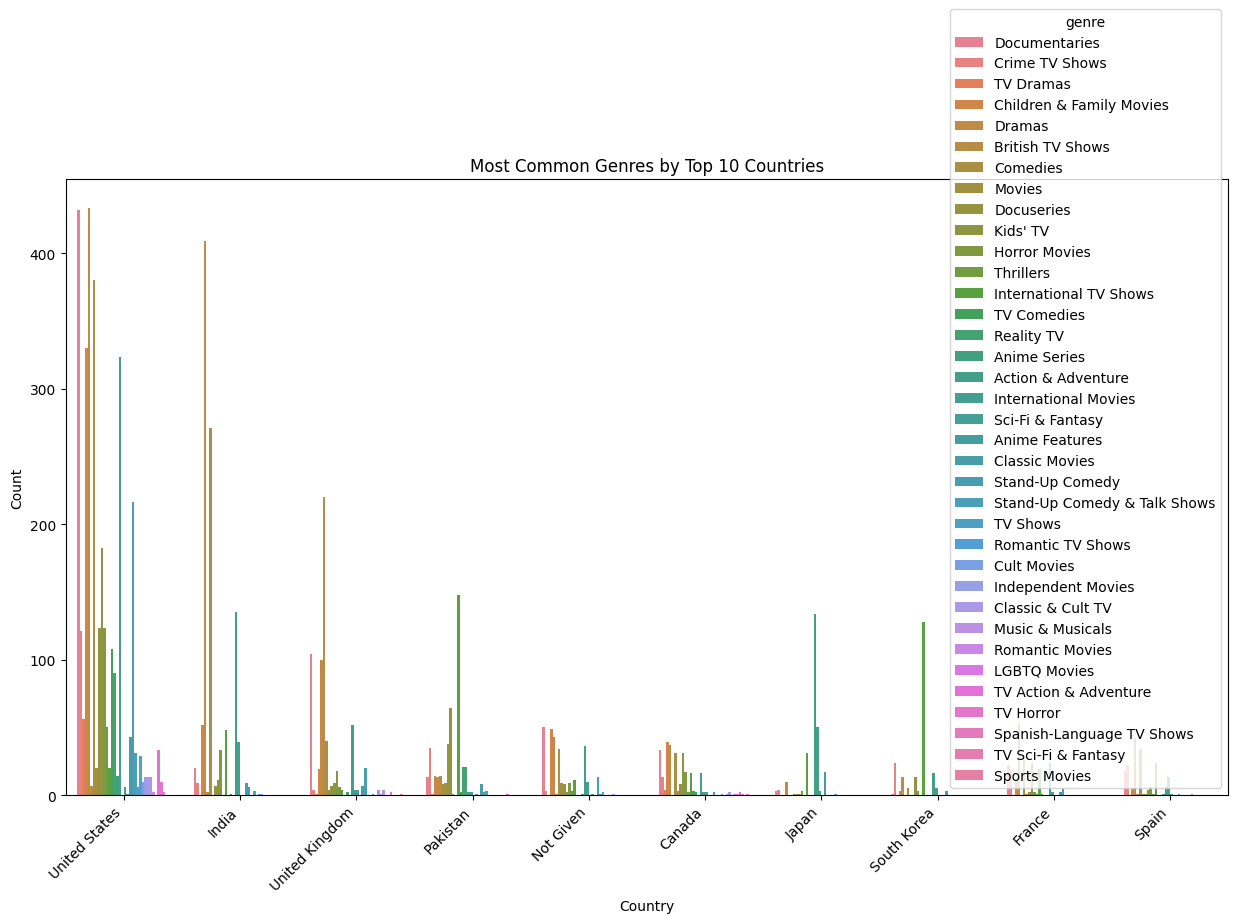

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='country', hue='genre', data=df,
order=df['country'].value_counts().index[:10])
plt.title('Most Common Genres by Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

This grouped count plot shows genre distribution by country. For example, India leads in Dramas and Romantic content. The chart helps understand regional content preferences and specialization.



# **Word Cloud of Movie Titles**

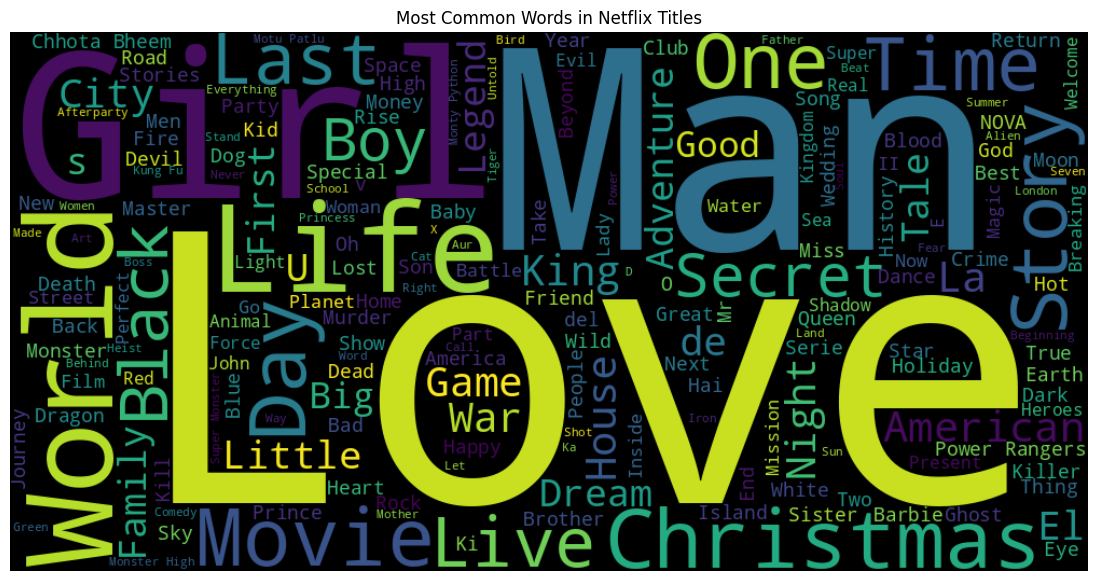

In [ ]:
from wordcloud import WordCloud
titles = ' '.join(df['title'].dropna())
wordcloud = WordCloud(width=1000, height=500, background_color='black').generate(titles)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Titles')
plt.show()


This word cloud highlights the most frequently occurring words in Netflix titles. Words like “Love,” “Story,” or “Night” often dominate, reflecting thematic preferences such as romance, mystery, or drama.



# **Number of Movies and TV Shows Added Each Year**

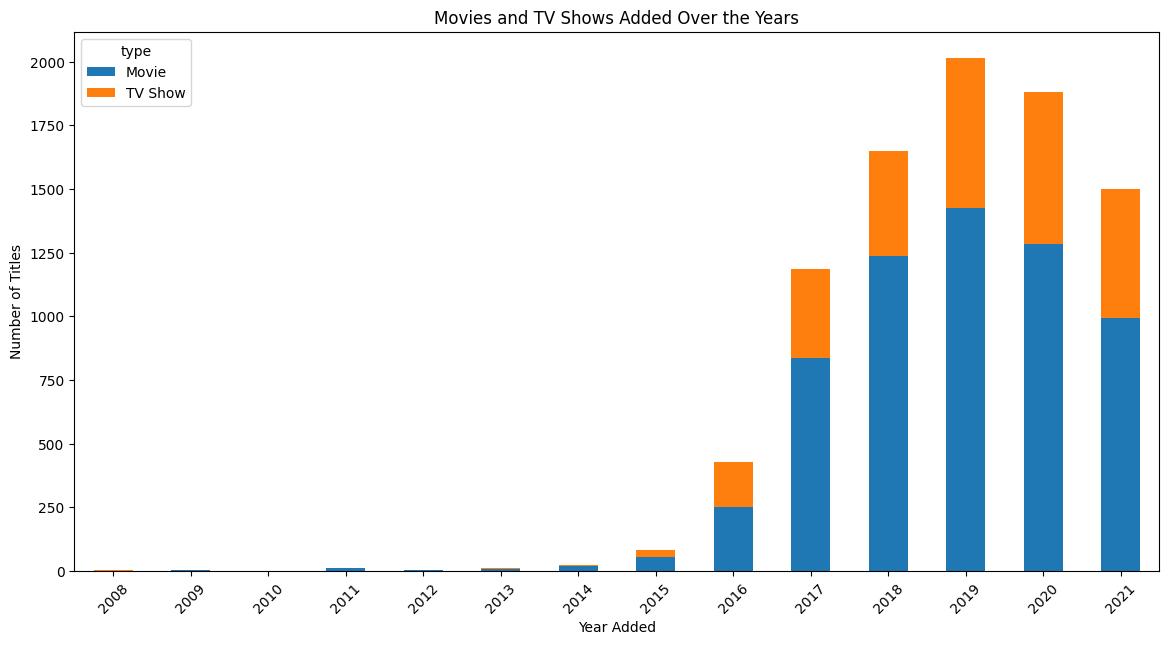

In [ ]:
added_content = df.groupby(['year_added', 'type'])['show_id'].count().unstack()
added_content.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Movies and TV Shows Added Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


This stacked bar chart shows a growing trend in both movie and TV show additions from 2015 to 2020. Movies consistently outnumber TV shows, but both have risen, reflecting Netflix's increasing content output yearly.

# **Number of Unique Directors Over the Years**

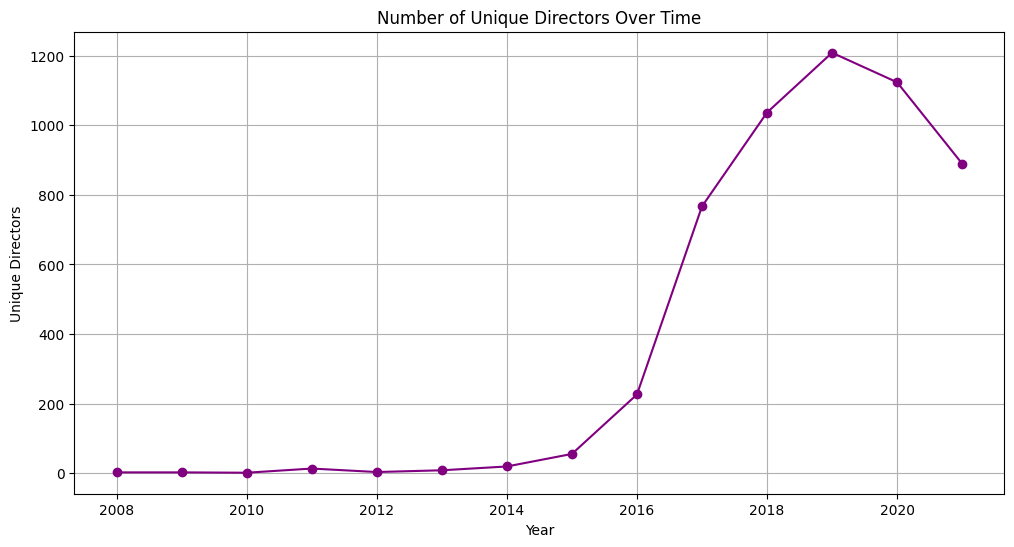

In [ ]:
unique_directors = df.groupby('year_added')['director'].nunique()
plt.figure(figsize=(12,6))
plt.plot(unique_directors.index, unique_directors.values, marker='o', color='purple')
plt.title('Number of Unique Directors Over Time')
plt.xlabel('Year')
plt.ylabel('Unique Directors')
plt.grid(True)
plt.show()


This chart shows that Netflix collaborated with more unique directors in later years, peaking around 2018–2020. It suggests growing diversity and inclusion of new creative voices on the platform.



# **Content Count by Genre and Type**

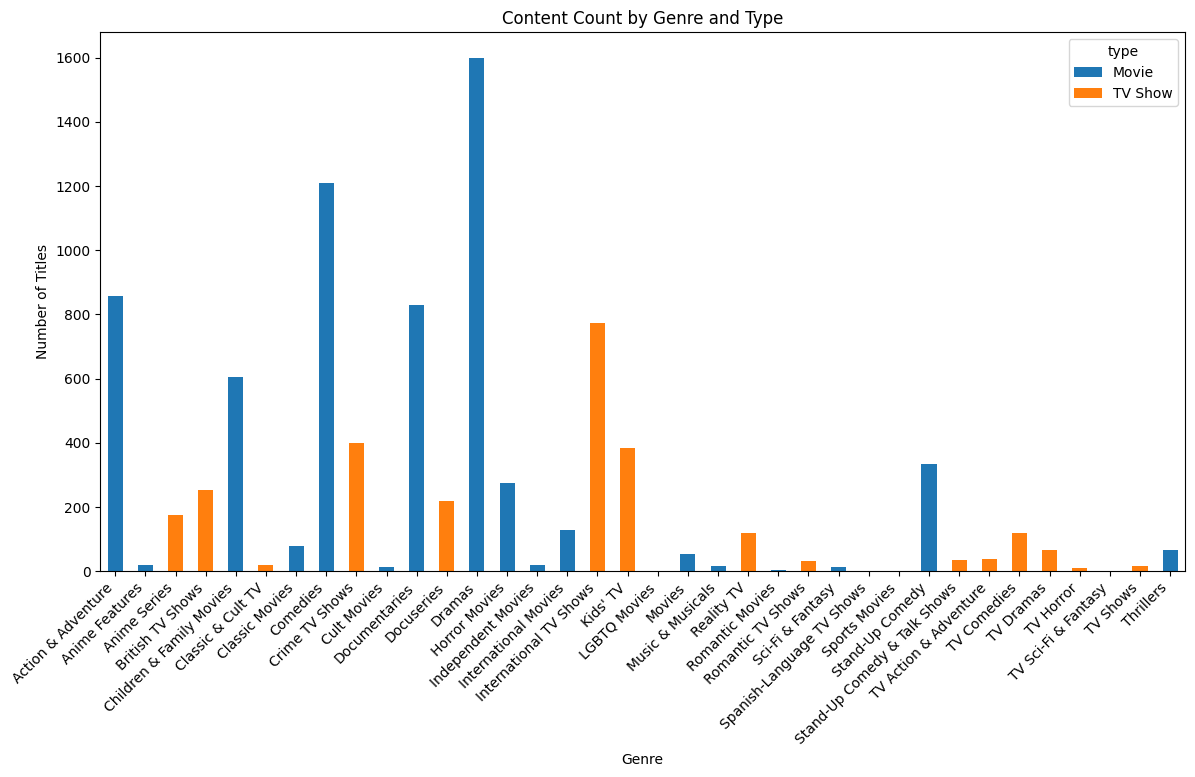

In [ ]:
genre_type = df.groupby(['genre', 'type'])['show_id'].count().unstack().fillna(0)
genre_type.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Content Count by Genre and Type')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.show()


This stacked bar chart compares genre distribution between movies and TV shows. Some genres, like “Dramas,” appear equally in both types, while others, like “Children,” are mostly TV shows. It helps identify the preferred format for each genre.

# **Month-wise Content Addition Trend**

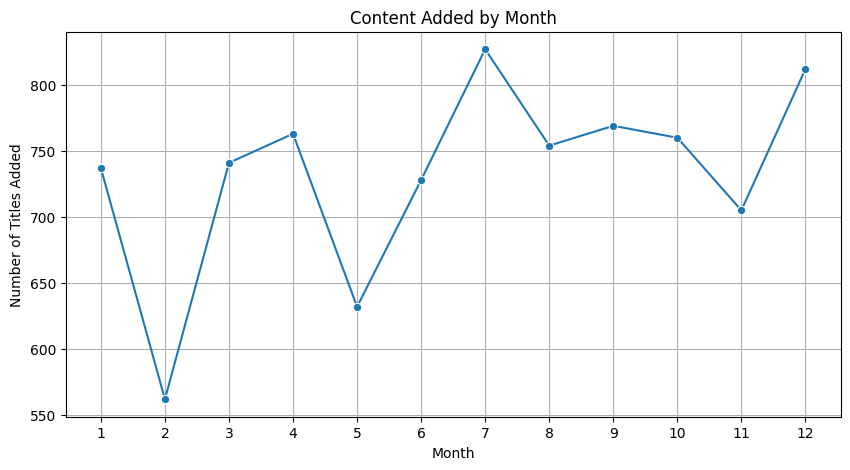

In [ ]:
df['month_added'] = df['date_added'].dt.month
monthwise = df['month_added'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.lineplot(x=monthwise.index, y=monthwise.values, marker='o')
plt.title('Content Added by Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.xticks(range(1,13))
plt.grid(True)
plt.show()


This line chart reveals seasonal content addition patterns. July and December often have spikes, suggesting strategic content drops during summer vacations and holiday seasons to maximize viewer engagement.





The visualizations provide deep insights into Netflix's content strategy and audience preferences. The **Distribution of Content Types** chart reveals that movies dominate the platform, though TV shows also make up a substantial portion, showing variety in content formats. The **Number of Releases Per Year** indicates a consistent rise in content releases, peaking in recent years, reflecting Netflix’s growing investment in original and diverse content. The **Top 10 Genres** chart shows that drama, comedy, and action are the most popular, revealing viewers' strong interest in emotionally engaging and entertaining stories. The **Content Added Over Time** graph reflects the growth of Netflix’s library, especially after 2016, marking Netflix's global expansion and content acquisition strategy.

The **Distribution of Ratings** chart suggests that most content is rated for teens and mature audiences, highlighting the platform’s focus on older age groups. The **Movie Duration Distribution** reveals that most movies on Netflix fall within the 80–120 minute range, aligning with standard feature film lengths. The **TV Show Seasons Distribution** shows that most shows have 1–2 seasons, implying that either limited series are popular or many shows get canceled early. The **Top 10 Countries Producing Content** chart points to the US, India, and the UK as leading contributors, reflecting Netflix’s dominance in and focus on English-speaking markets. The **Genre vs. Release Year Scatterplot** shows how genres have evolved over time, with certain genres like documentaries and thrillers increasing in the last decade.

The **Rating vs. Type** chart compares how different ratings apply to movies and shows, confirming that both content types often share similar rating categories. The **Top 10 Directors** chart highlights directors like Raúl Campos and Marcus Raboy who frequently contribute, possibly due to stand-up specials and niche content. The **Most Common Genres by Top Countries** heatmap shows that countries have genre preferences, e.g., India produces more romantic and dramatic content, while the US has broader variety. The **Top 10 Countries by Content Addition Yearly** bar chart from the extra graphs shows which countries have consistently added more content over time. Finally, the **Content Growth by Type Over the Years** (stacked area plot) shows that movie uploads have slowed while TV shows have gradually increased, suggesting a shift in Netflix’s strategy.

